In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
import requests
from selenium import webdriver as wd

In [177]:
import time

In [173]:
from selenium.webdriver.chrome.options import Options 

In [3]:
r=requests.get('https://en.wikipedia.org/wiki/List_of_minor_secular_observances')

In [5]:
soup=bs(r.text,'html.parser')

In [9]:
s1=soup.findAll('tbody')

In [160]:
text=''
for i in s1:
    text+=(i.text)

In [161]:
import re
text=text.replace('Date','')
text=text.replace('Name','')
text=text.replace('Established/recognized by','')
text=re.sub(r'\[.*\]','',text)


In [114]:
list1=text.split('\n')

In [285]:
l=[]
for i in list1[1:]:
    if i=='':
        continue
    else:
        l.append(i)

In [286]:
day=[]
date=[]
for i in range(len(l)):
    if i in day:
        continue
    if ('International' in l[i] or 'World' in l[i]) and 'Day' in l[i]:
        day.append(l[i])
        date.append(l[i-1])

In [287]:
day

['International Public Domain Day',
 'World Braille Day (birthday of Louis Braille)',
 'International Parity at Work Day',
 'International Customs Day',
 'International Holocaust Remembrance Day',
 'World Religion Day',
 'World Hijab Day',
 'World Aspergillosis Day',
 'World Wetlands Day',
 'World Cancer Day',
 'World Nutella Day',
 'International Day of Zero Tolerance to Female Genital Mutilation',
 'International Safer Internet Day',
 'World Day of the Sick',
 'International Day of Women and Girls in Science',
 "International Day of Women's Health",
 'World Radio Day',
 'World Valentine Day',
 'International Childhood Cancer Day',
 'World Day of Social Justice',
 'International Mother Language Day',
 'World Thinking Day',
 'World NGO Day',
 'World Civil Defence Day',
 'World Wildlife Day',
 "International Women's Day",
 'World Glaucoma Day',
 'World Consumer Rights Day, World Sleep Day',
 'World Contact Day',
 'World Oral Health Day',
 'International Day of Francophonie',
 'Internati

In [288]:
date

['January 1',
 'January 4',
 'January 11',
 'January 26',
 'January 27',
 'Third Sunday in January',
 'February 1',
 'February 1',
 'February 2',
 'February 4',
 'February 5',
 'February 6',
 'February 7',
 'February 11',
 'February 11',
 'February 12',
 'February 13',
 'February 14',
 'February 15',
 'February 20',
 'February 21',
 'February 22',
 'February 27',
 'March 1',
 'March 3',
 'March 8',
 'March 12',
 'March 15',
 'March 15',
 'March 20',
 'March 20',
 'March 20',
 'March 20',
 'March 20',
 'March 21',
 'March 21',
 'March 21',
 'March 21',
 'March 21',
 'March 21',
 'March 21',
 'March 22',
 'March 23',
 'March 24',
 'March 25',
 'March 25',
 'March 27',
 'March 28',
 'March 30',
 'March 31',
 'March 31',
 'March (Second Thursday)',
 'April 2',
 'April 2',
 'April 6',
 'April 6',
 'April 7',
 'April 8',
 'April 10',
 'April 11',
 'April 15',
 'April 16',
 'April 17',
 'April 18',
 'April 22',
 'April 23',
 'April 24',
 'April 24',
 'April 24',
 'April 25',
 'April 26',
 'Ap

In [53]:
import pandas as pd

In [289]:
d1={'DATE':date[:-1],'DAYS':day[:-1]}

In [290]:
df=pd.DataFrame(d1)

In [386]:
df.head()

,DATE,DAYS
0,January 1,International Public Domain Day
1,January 4,World Braille Day (birthday of Louis Braille)
2,January 11,International Parity at Work Day
3,January 26,International Customs Day
4,January 27,International Holocaust Remembrance Day


In [292]:
df.to_csv('Days2.csv')

In [318]:
df2=pd.read_csv('days2.csv')

In [294]:
l1=[]
dd=df2['DAYS'].values

In [281]:
def get_posts_insta(tag):
    r=requests.get('https://www.instagram.com/explore/tags/'+tag+'/')
    soup=bs(r.text,'html.parser')
    try:
        
        h=soup.find('meta', {'name':"description"})['content']
    except TypeError:
        return 0
    
    x=re.findall(r'\S+',h)
    
    a=''
    for i in x[0]:
        if i==',':
            continue
        a+=i
    if 'k' in a:
        b=a[:-1]
        return int(float(b)*1000)
    elif 'm' in a:
        b=a[:-1]
        return int(float(b)*1000000)
    else:
        return int(a)
    

In [347]:
l1=[]
for i in dd:
    x1=re.sub(r' ','',i)
    
    x1=re.sub(r"\(.*\)",'',x1)
    x1=re.sub(r"\'",'',x1)
    y1=get_posts_insta(x1)
    l1.append(y1)

In [335]:
get_posts_insta('WorldPestDay')

245

In [349]:
l1

[0,
 1732,
 4,
 838,
 7269,
 556,
 52600,
 22,
 7852,
 218600,
 43400,
 50,
 9,
 718,
 4088,
 11,
 20200,
 18,
 5549,
 2456,
 9797,
 11200,
 1025,
 127,
 72000,
 6000000,
 296,
 0,
 151,
 6651,
 12,
 203900,
 5867,
 0,
 1444,
 727,
 80600,
 25,
 187300,
 3581,
 9382,
 173200,
 1542,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1361,
 256,
 564,
 34900,
 7973,
 1496,
 0,
 134,
 156,
 18800,
 498,
 21500,
 1,
 168,
 1114,
 59400,
 6,
 75,
 0,
 5468,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 67,
 66,
 336,
 30100,
 49400,
 4099,
 12500,
 0,
 89500,
 0,
 623,
 66,
 331,
 7574,
 49100,
 32600,
 224,
 1218,
 43500,
 3349,
 111,
 287,
 33500,
 132500,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [350]:
df2=pd.read_csv('days2.csv')

In [351]:
df2['posts']=l1

In [352]:
df2=df2.sort_values('posts',ascending=False)

In [353]:
df2.reset_index(inplace=True)

In [354]:
df2=df2[['DATE','DAYS','posts']]

In [355]:
df2

,DATE,DAYS,posts
0,March 8,International Women's Day,6000000
1,February 4,World Cancer Day,218600
2,March 20,International Day of Happiness,203900
3,March 21,World Down Syndrome Day,187300
4,March 22,World Water Day,173200
5,October (day in 1st week),World Ballet Day,156400
6,September 29,International Coffee Day,132500
7,October (First Friday),World Smile Day,123000
8,1st Fri in Oct,World Smile Day,123000
9,November 17,World Prematurity Day,120900


In [303]:
df2.to_csv('Int_days.csv')

In [387]:
import seaborn as sns

In [388]:
import matplotlib.pyplot as plt

In [400]:
d=list(df2['DAYS'].values[:50])
p=list(df2['posts'].values[:50])

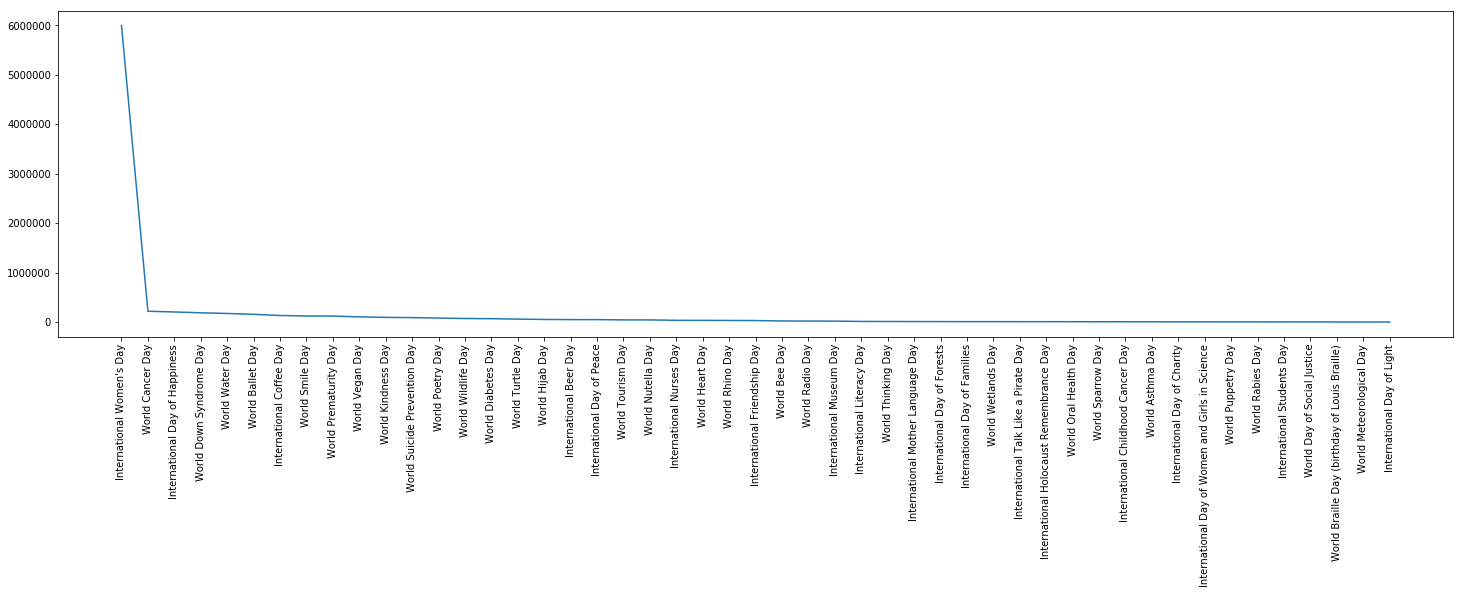

In [415]:
plt.figure(figsize=(25,6))
plt.plot(d,p)
plt.xticks(rotation=90)
plt.show()

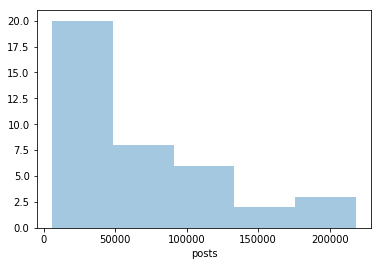

In [422]:
sns.distplot(df2['posts'][1:40],kde=False)